# More about Exploratory Analysis

In [1]:
import numpy as np
import scipy.stats as ss

## Hypothesis test, Chi-squared Test and Variance Test

### Hypothesis Test

* A hypothesis test in statistics is used to determine whether there is enough evidence **in a sample of data** to **infer** that a certain condition is true for the **entire population**.
* How It Works:
    * Build $H_0$ and $H_1$
    * Choose the measure metrics (mean, variance)
    * Choose confidence interval and reject area($\alpha = 0.05$)
    * Calculate $p-value$
        * If $p-value < \alpha$, $H_0$ is false
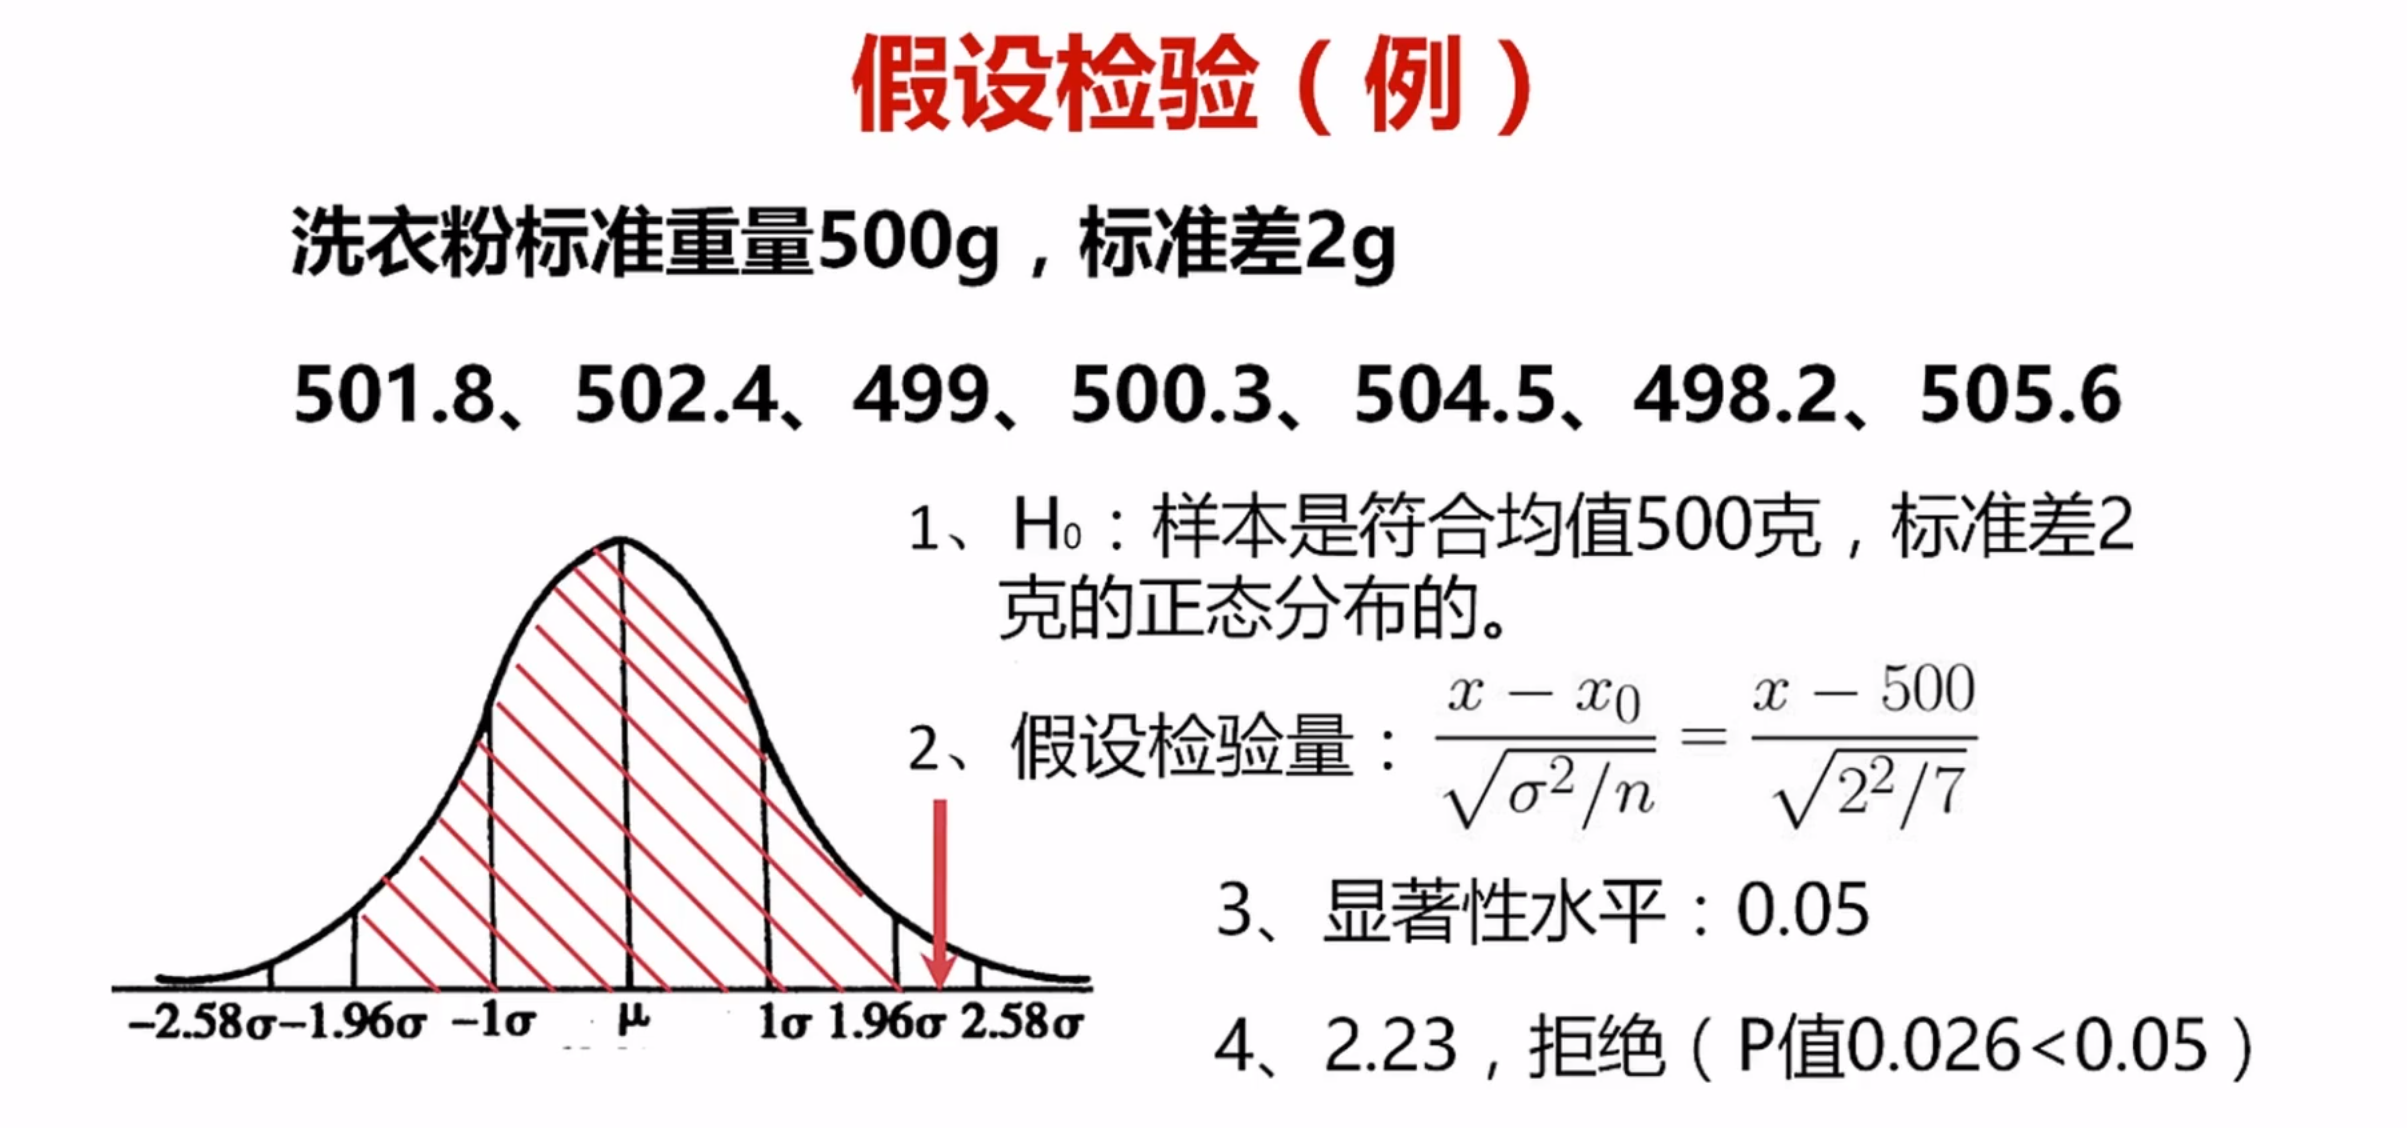

### Chi-squared Test
* $\chi^2=\sum_{i=1}^{k}\frac{(f_i-np_i)^2}{np_i}$
* The Chi-squared test is a statistical hypothesis test that is used to determine whether there is a **significant difference** between the **expected frequencies** and the **observed frequencies** in one or more categories. 
    * Goodness of Fit Test
    * Test of Independence
        * To determine if there is a relationship between two categorical variables.
* How It Works:
    * **Calculate the Expected Frequencies**: Based on the probabilities or the marginal totals of the table.
    * **Chi-squared Statistic**: Use the formula:
        * $\chi^2=\sum_{i=1}^{k}\frac{(f_i-np_i)^2}{np_i}$
        * Where *f_i* is the observed frequency and $np_i$ is the expected frequency
    * **Compare to Chi-squared Distribution**: Determine whether the calculated statistic is likely to have occurred by chance. 
    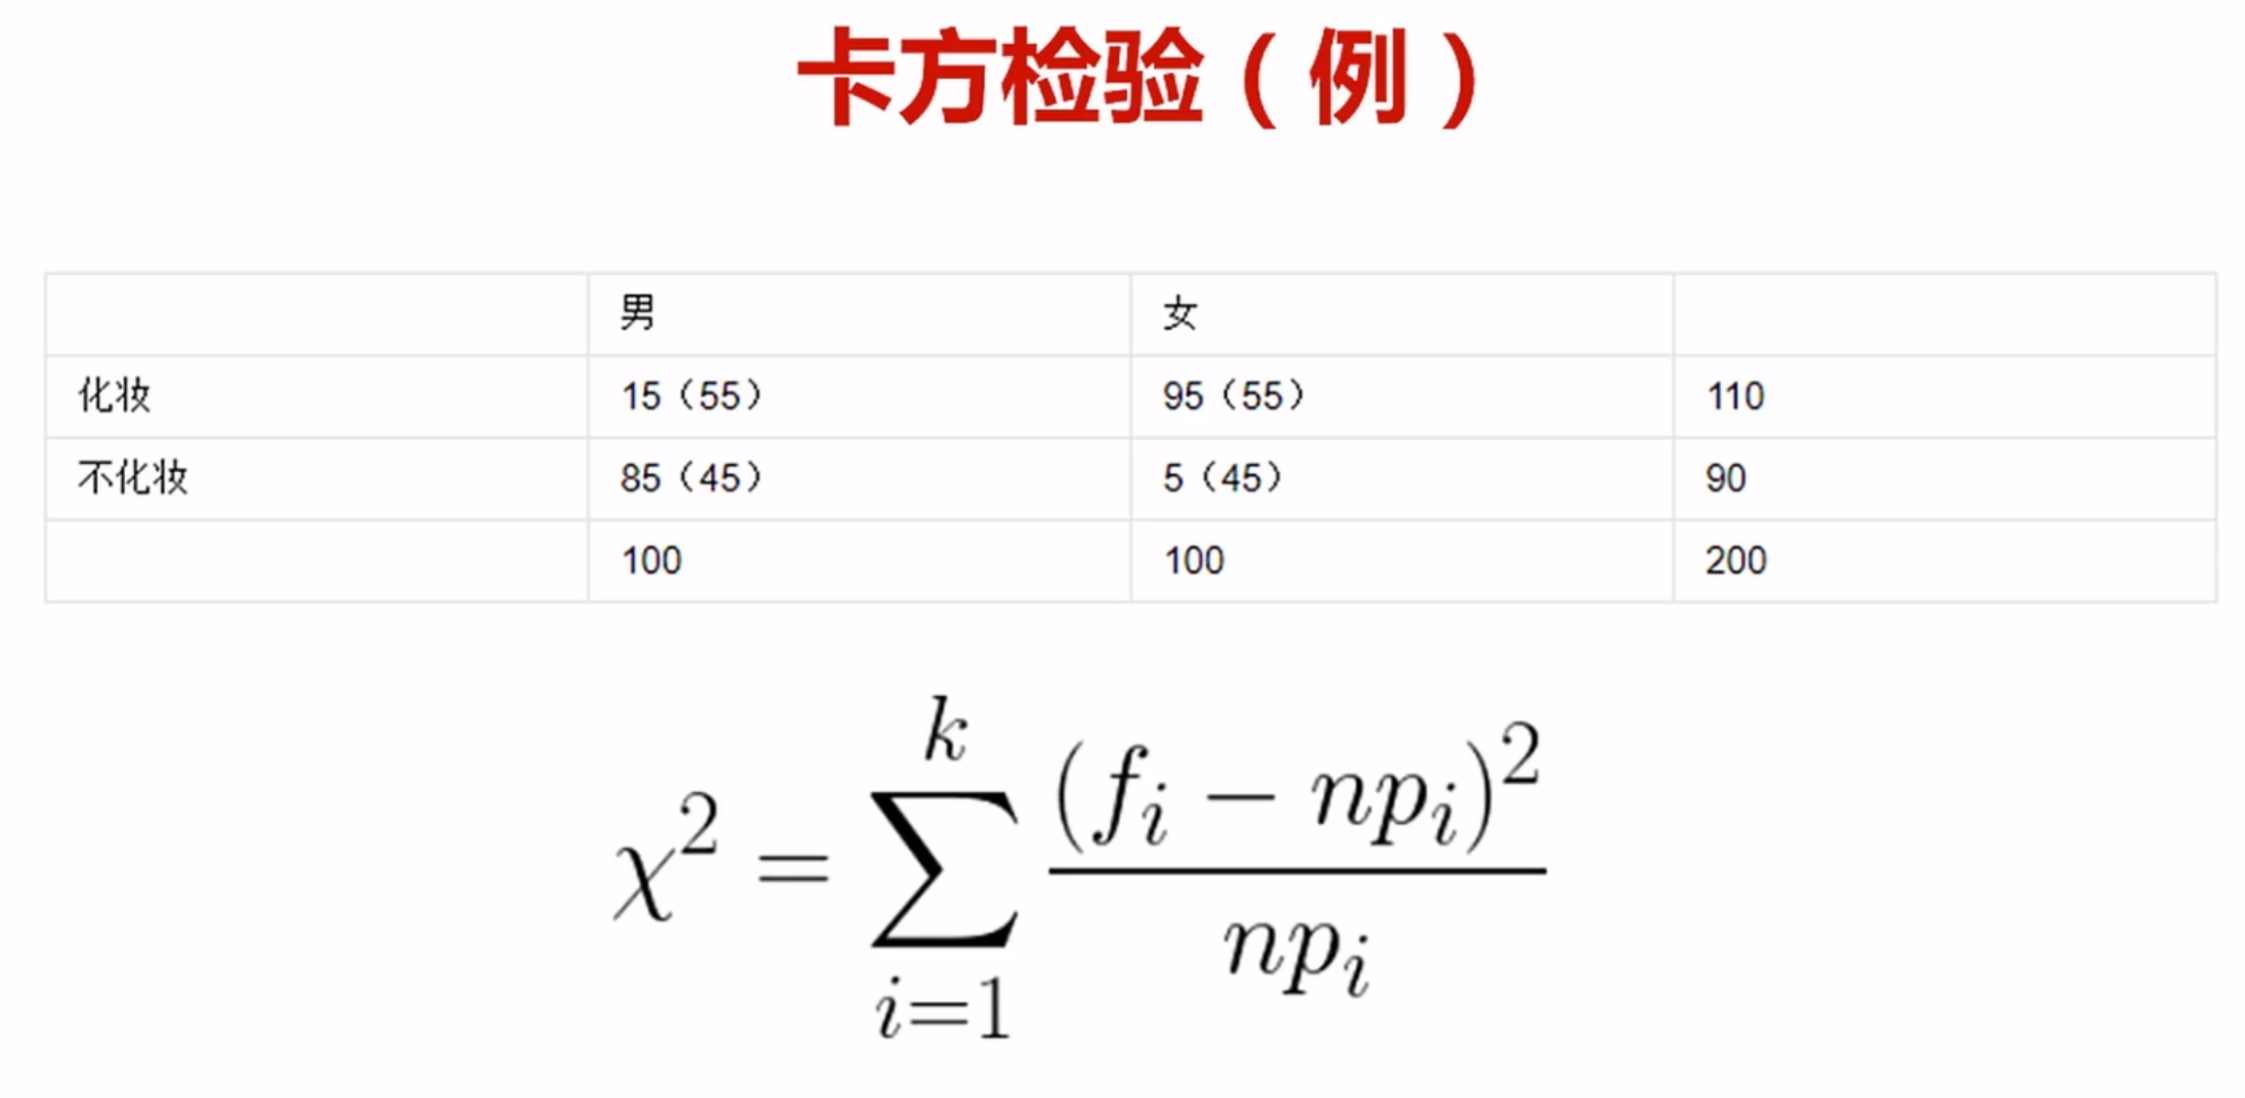
    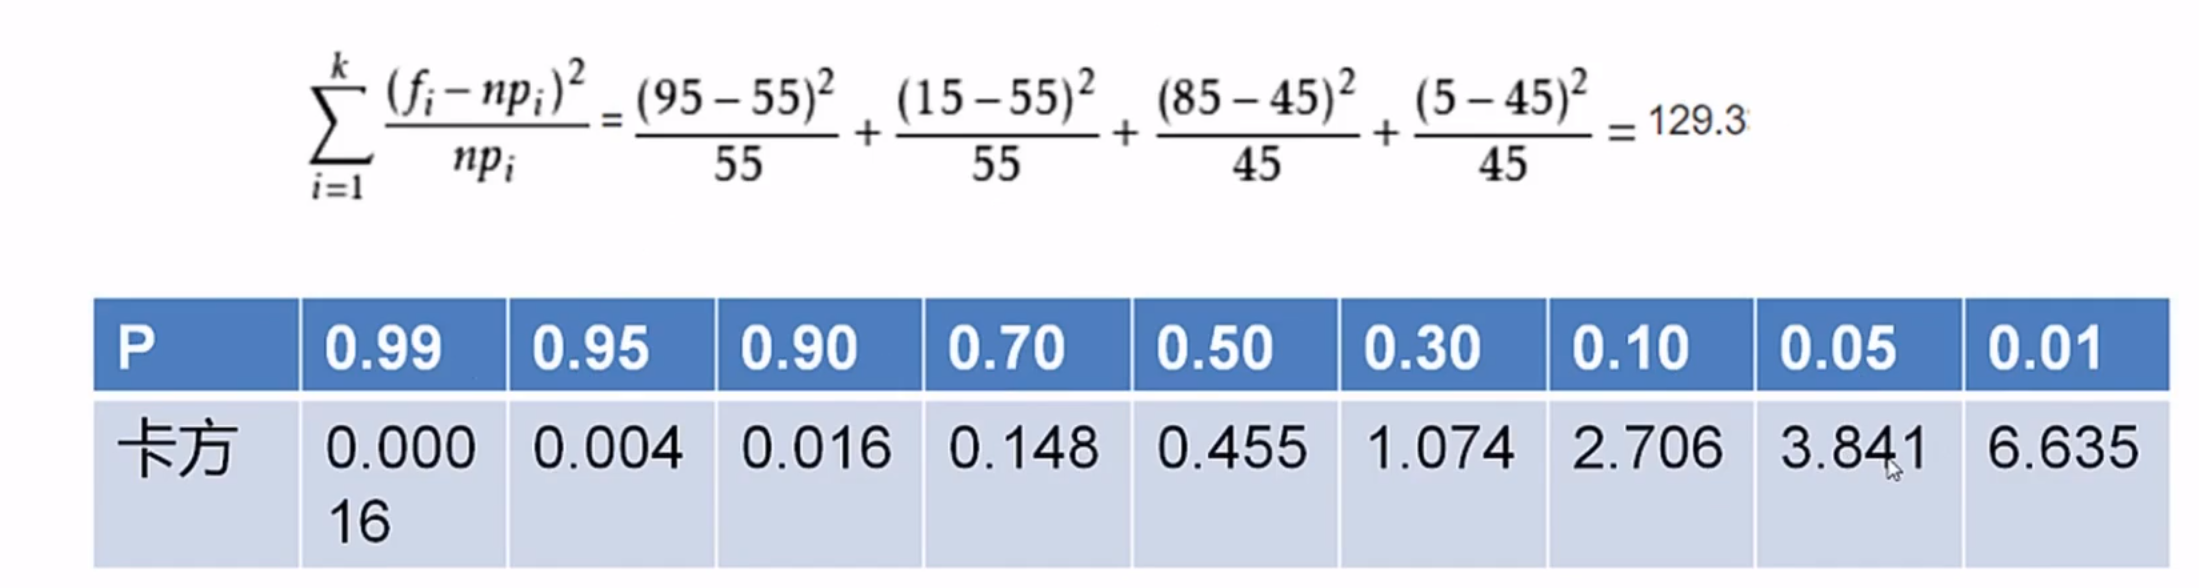

### Variance(F) Test
* $F=\frac{SSM/m-1}{SSE/(n-m)}$, with degree of freedom as (m-1,n-m)
    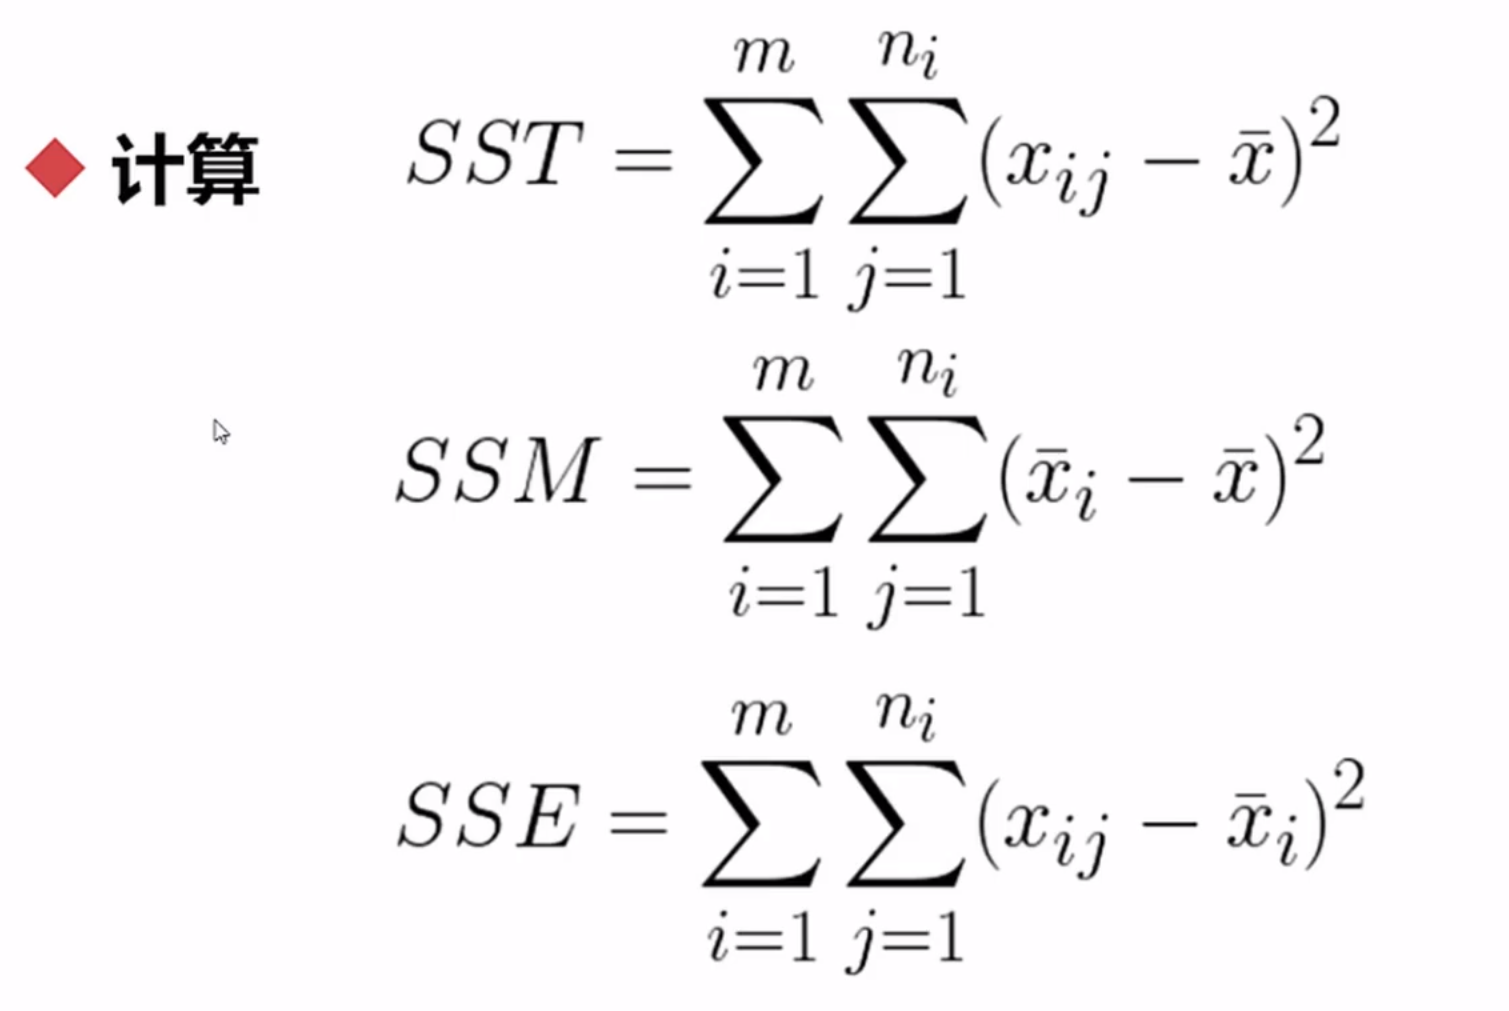
    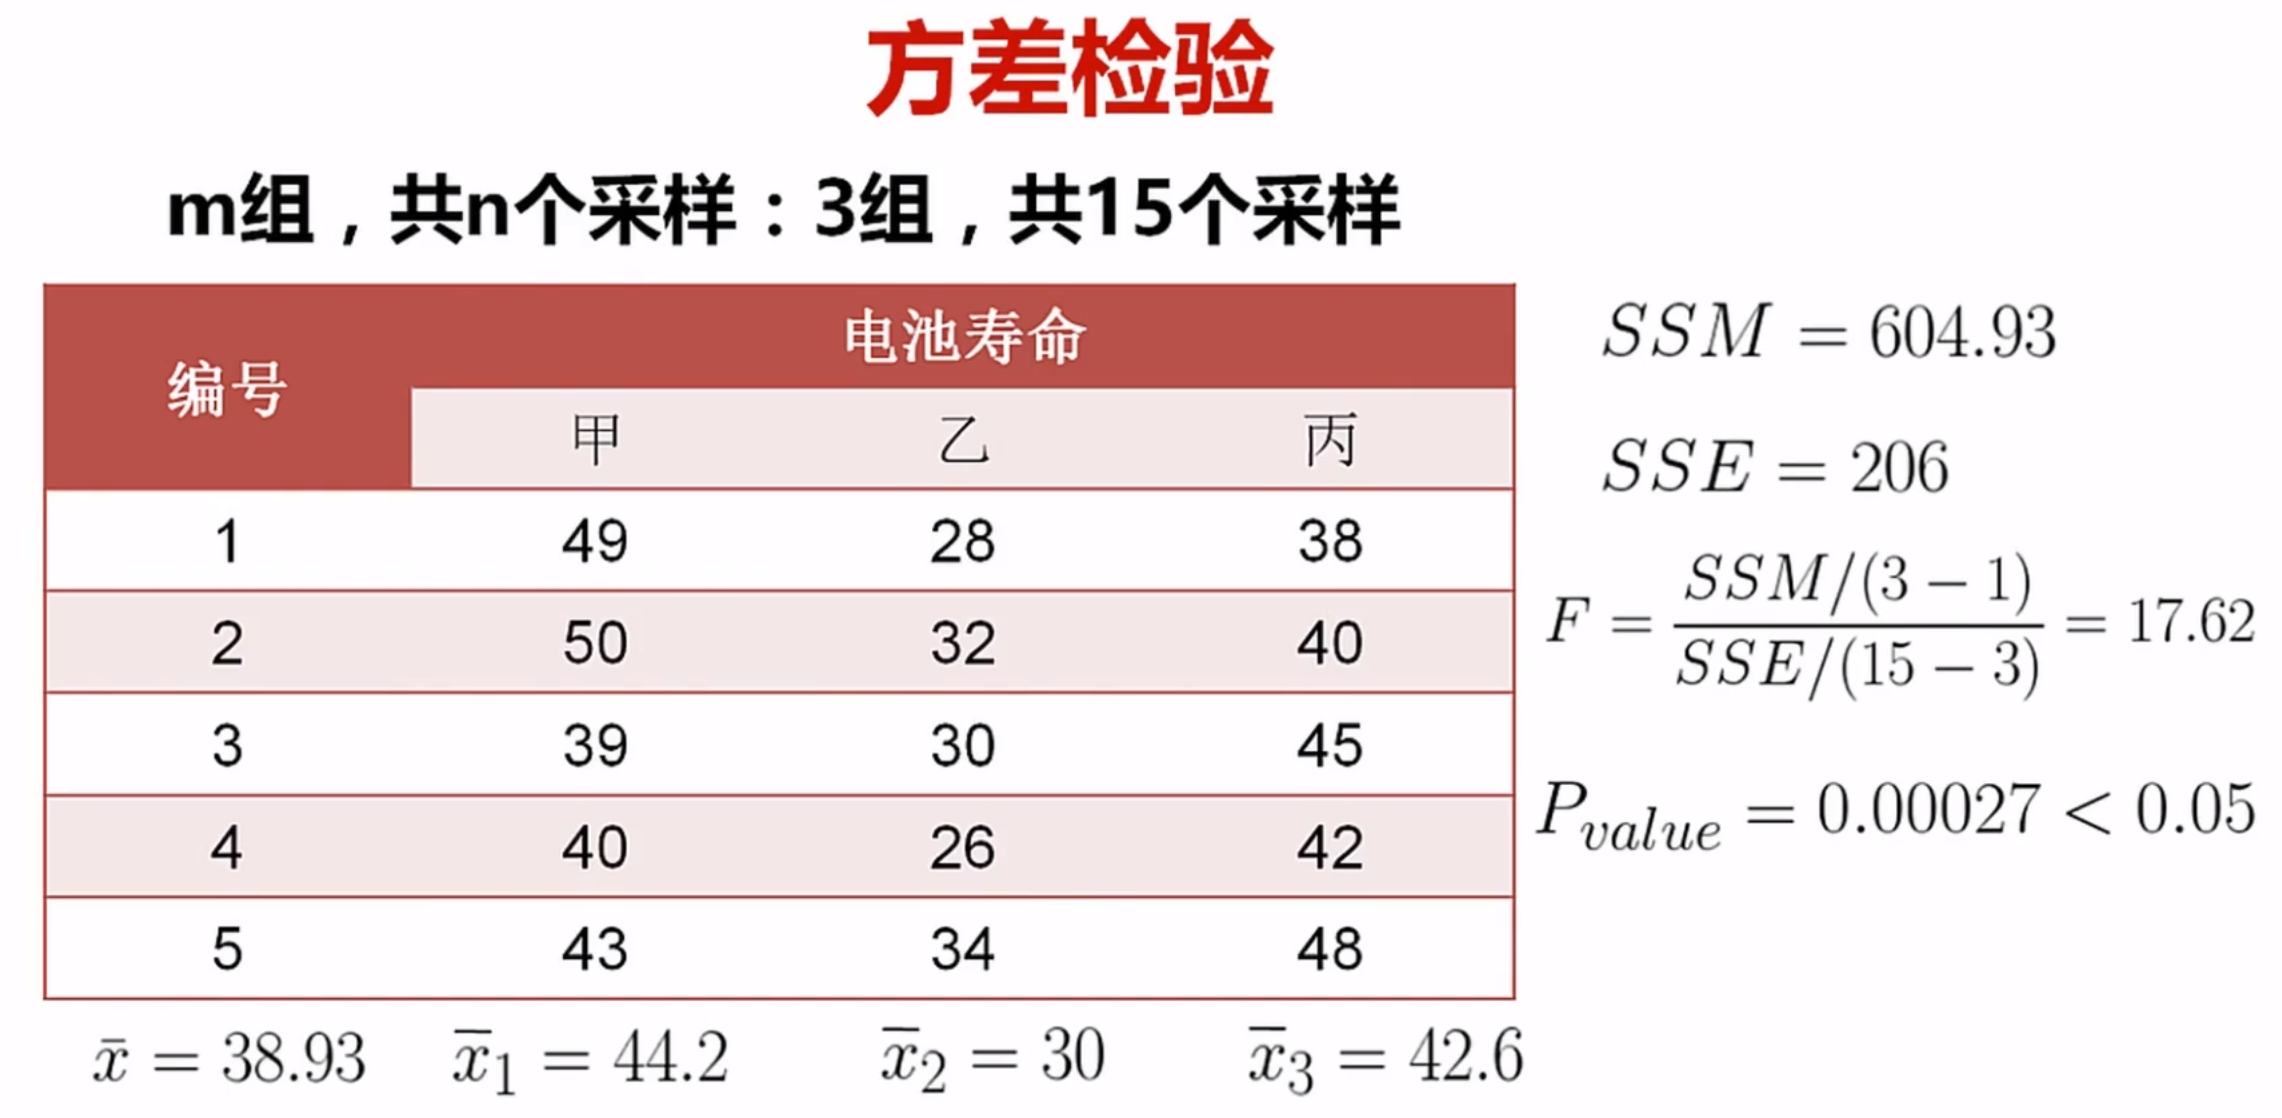
    

In [2]:
### Normal test
### Simulate data
norm_dist = ss.norm.rvs(size = 20)

### Test whether it's a normal distribution
ss.normaltest(norm_dist)

NormaltestResult(statistic=0.562308674894237, pvalue=0.7549118153263508)

In [3]:
### Chi-squared test
ss.chi2_contingency([[15,95],[85,5]])

Chi2ContingencyResult(statistic=126.08080808080808, pvalue=2.9521414005078985e-29, dof=1, expected_freq=array([[55., 55.],
       [45., 45.]]))

$t=\frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{(n_1-1)S_1^2+(n_2-1)S_2^2}{n_1+n_2-2}(1/n_1+1/n_2)}}$

In [4]:
### T test
ss.ttest_ind(ss.norm.rvs(size = 100),ss.norm.rvs(size = 200))

TtestResult(statistic=0.40425256187968656, pvalue=0.6863169787702312, df=298.0)

In [5]:
### F test
ss.f_oneway([49,50,39,40,43],[28,32,30,26,34],[38,40,45,42,48])

F_onewayResult(statistic=17.619417475728156, pvalue=0.0002687153079821641)

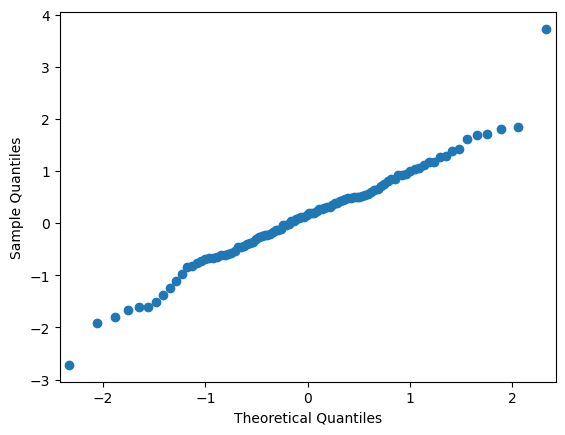

In [6]:
### QQ Plot
from statsmodels.graphics.api import qqplot
import matplotlib.pyplot as plt

plt.show(qqplot(ss.norm.rvs(size = 100)))

## Correlation Coefficient
### Pearson
* $\rho(X,Y) = \frac{Cov(X,Y)}{\sigma_x\sigma_y}=\frac{E[(X-\mu_x)(Y-\mu_y)]}{\sigma_x\sigma_y}$
* 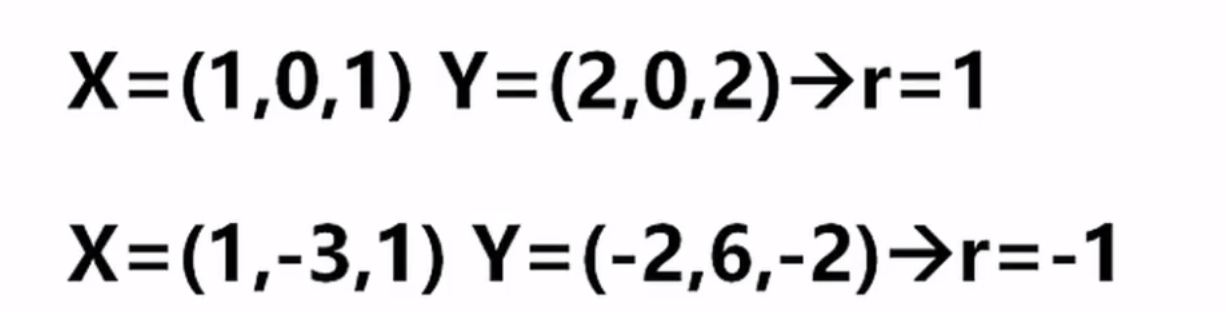

### Spearman
* $\rho_s=1-\frac{6\sum d_i^2}{n(n^2-1)}$
* For rank difference, n is the number of observations, d is the rank difference
* 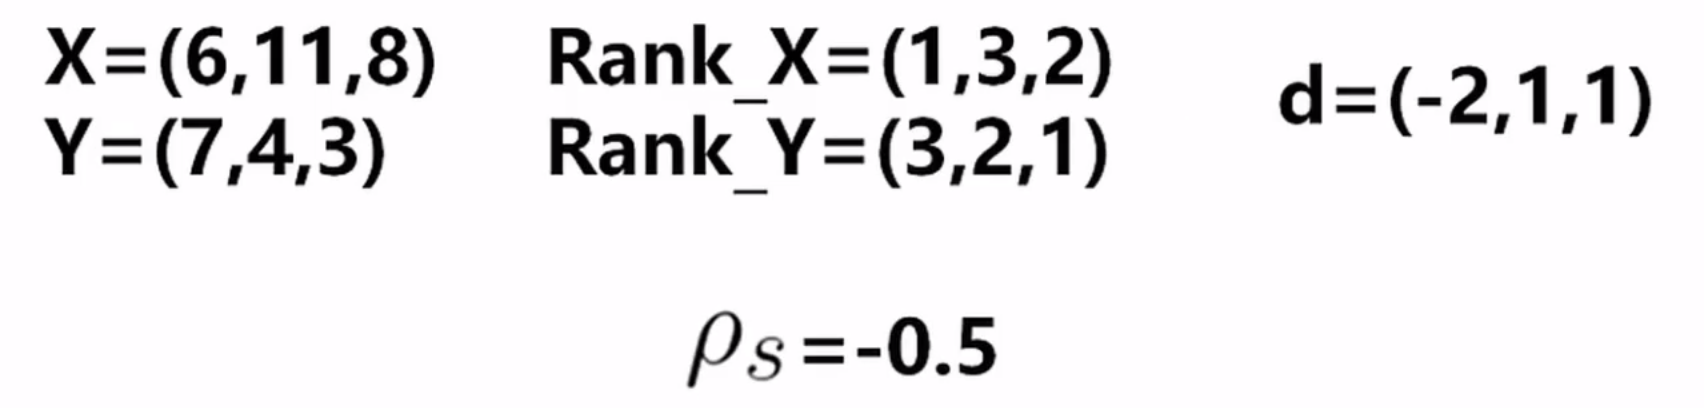


In [7]:
### Correlation Example

import pandas as pd

s1 = pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])
s2 = pd.Series([0.5,0.4,1.2,2.5,1.1,0.7,0.1])

### Pearson
s1.corr(s2)

0.9333729600465923

In [8]:
### Spearman
s1.corr(s2, method="spearman")

0.7142857142857144

In [9]:
df = pd.DataFrame(np.array([s1,s2]).T)
df

0    1
0  0.1  0.5
1  0.2  0.4
2  1.1  1.2
3  2.4  2.5
4  1.3  1.1
5  0.3  0.7
6  0.5  0.1

In [10]:
df.corr()

0         1
0  1.000000  0.933373
1  0.933373  1.000000

In [11]:
df.corr(method="spearman")

0         1
0  1.000000  0.714286
1  0.714286  1.000000

## Regression

* 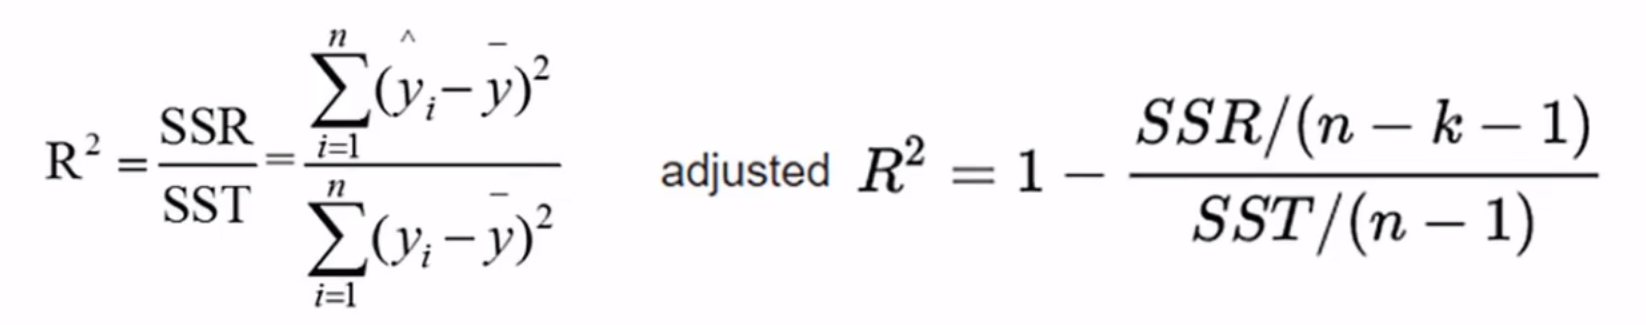

### Durbin-Watson (DW) test 
* The Durbin-Watson (DW) test is a statistical test used to detect the presence of **autocorrelation** (a relationship between values separated from each other by a given time lag) **in the residuals** (prediction errors) from a regression analysis.
* $DW=\frac{\sum_{t=2}^T(e_t-e_{t-1})^2}{\sum_{t-1}^{T}e_t^2}$
    * where $e_t$ is the residual at time $t$ and $T$ is the number of observations.
* The DW statistic ranges from 0 to 4, where:
    * A value of approximately 2 indicates no autocorrelation.
    * A value **less than 2 suggests positive autocorrelation** (one error is likely to follow another in a positive direction). **greater than 2 implies negative autocorrelation** (one error is likely to follow another in a negative direction).

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
### Regression Example

x = np.arange(10).astype(np.float32).reshape((10,1))
y = 3*x + 4 + np.random.random((10,1))

reg = LinearRegression()
reg.fit(x,y)
y_pred = reg.predict(x)
[x for x in zip(y,y_pred)]

[(array([4.95098943]), array([4.686805], dtype=float32)),
 (array([7.5998249]), array([7.6648602], dtype=float32)),
 (array([10.49714832]), array([10.642916], dtype=float32)),
 (array([13.20184698]), array([13.620971], dtype=float32)),
 (array([16.73697431]), array([16.599026], dtype=float32)),
 (array([19.9183571]), array([19.577084], dtype=float32)),
 (array([22.37555718]), array([22.555138], dtype=float32)),
 (array([25.80694869]), array([25.533192], dtype=float32)),
 (array([28.12542185]), array([28.51125], dtype=float32)),
 (array([31.66748377]), array([31.489304], dtype=float32))]

In [14]:
reg.coef_,reg.intercept_

(array([[2.9780555]], dtype=float32), array([4.686805], dtype=float32))

## Principal Component Analysis(PCA) and Singular Value Decomposition(SVD)
### Principal Component Analysis(PCA)
* Principal Component Analysis (PCA) is a statistical technique used for **dimensionality reduction** while preserving as much of the data's variation as possible. 
* How it works
    * **Standardize the Data**: PCA is affected by the scale of the variables, so it's common to standardize the data first.
    * **Covariance Matrix Computation**: Calculate the covariance matrix to understand how variables vary with respect to each other.
    * **Eigenvalue and Eigenvector Calculation**: Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components. Eigenvectors determine the directions of the new feature space, and eigenvalues determine their magnitude.
    * **Sort and Select Principal Components**: Sort the eigenvalues and their corresponding eigenvectors in descending order. **The eigenvectors with the highest eigenvalues are the principal components.**
    * **Construct the Projection Matrix**: Form a projection matrix with the selected principal components.
    * **Transform the Original Dataset**: Use the projection matrix to transform the data into a new feature subspace.
    * $cov$ in the following graph contains a little error, should be $.61655556$ in the diagonal
    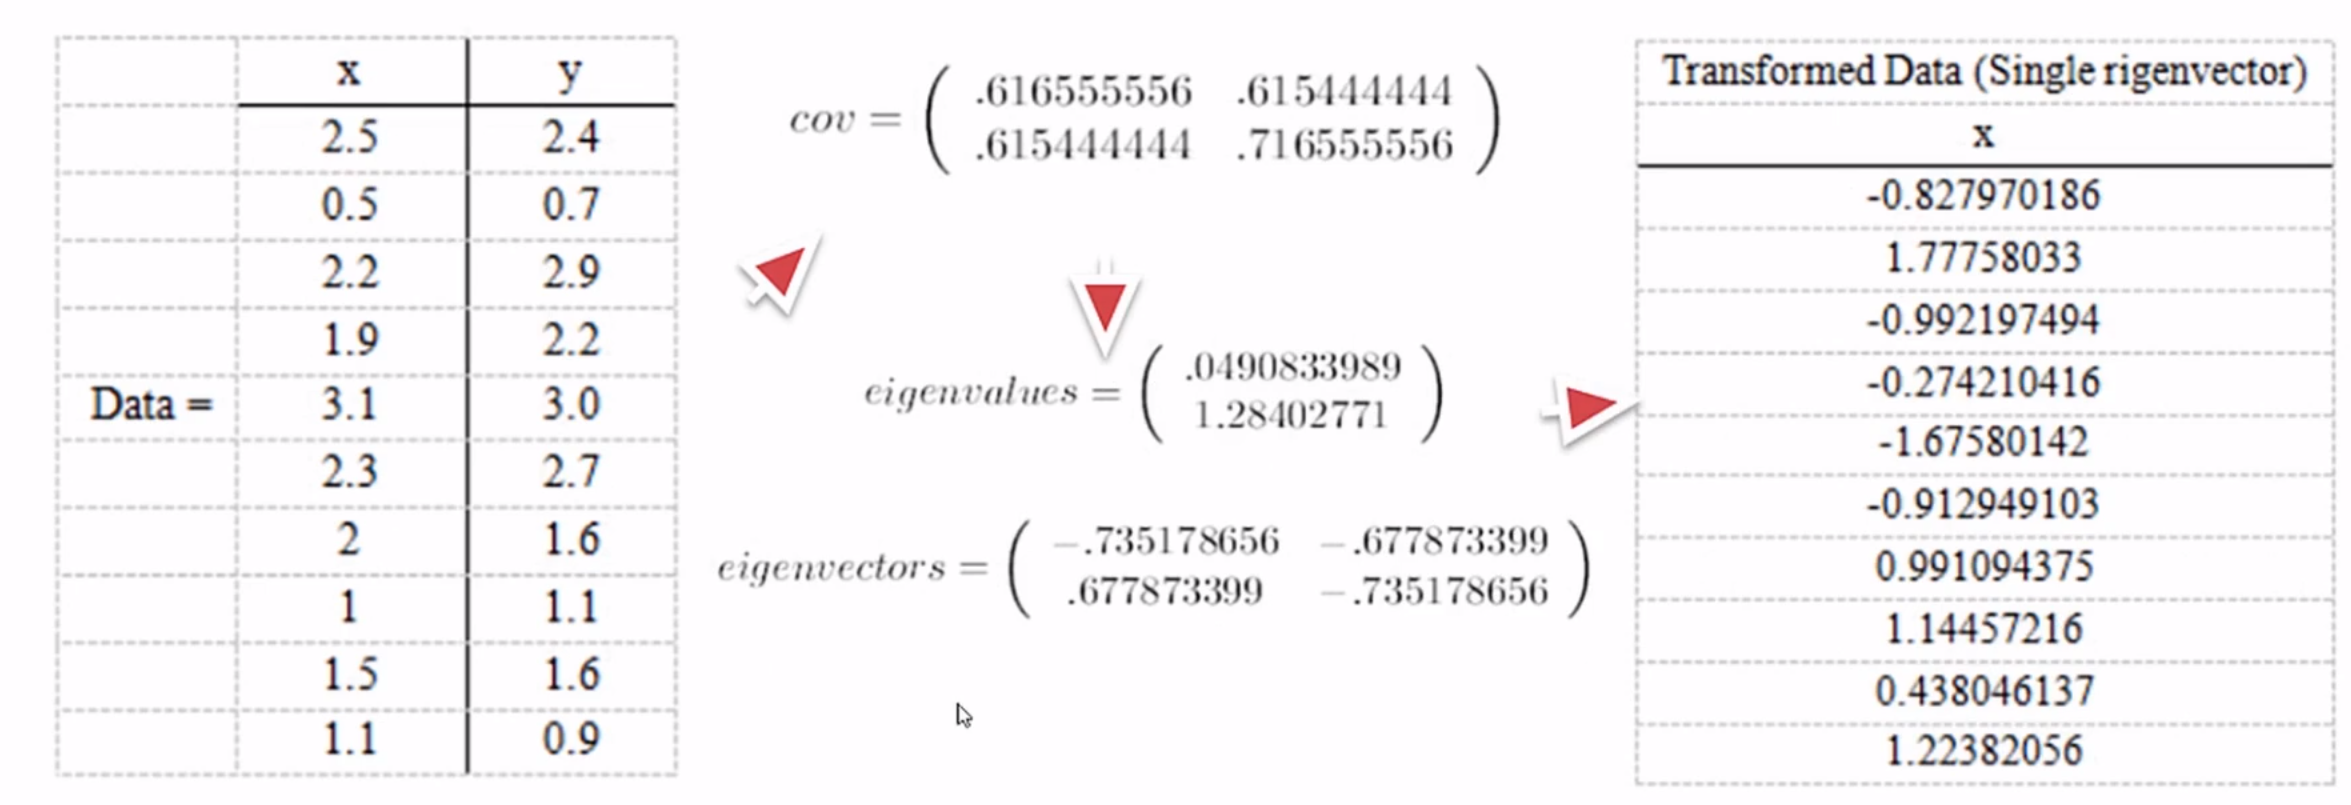


### Singular Value Decomposition(SVD)
* Singular Value Decomposition is a mathematical method used in numerical computation and signal processing. **It decomposes a matrix into three matrices**, providing a way to simplify complex matrix operations.
* $A_{m*n}=U_{m*r}\sum_{r*r} V^T_{r*n}$
    * $U$ and $V$ are orthogonal matrices.
        * $U$ contains the eigenvectors of $AA^*$
        * $V$ contains the eigenvectors of $A^*A$
    * $\sum$ is a diagonal matrix containing the singular values.

### PCA VS SVD
* While PCA and SVD are related (PCA can be performed using SVD), they are not the same:
    * PCA focuses on explaining the variance within the data and is a popular choice for data analysis and dimensionality reduction.
    * SVD is a more general matrix decomposition method used in a broader range of applications, including as a computational tool in PCA. In practice, SVD is often used to perform PCA, especially on large datasets, as it is computationally more efficient.

In [15]:
from sklearn.decomposition import PCA

In [16]:
data = np.array([[2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1],
                 [2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9]]).T
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [17]:
### PCA Example
### Sklearn use SVD to implement PCA
lower_dim = PCA(n_components=1)
lower_dim.fit(data)
lower_dim.explained_variance_ratio_

array([0.96318131])

In [18]:
lower_dim.fit_transform(data)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

In [19]:
### Implement PCA by our own

def myPCA(data, n_components = 100000):
    mean_vals = np.mean(data,axis=0) # get mean value by col
    mid = data - mean_vals
    cov_mat = np.cov(data,rowvar=False) # get covariance matrix by col
    from scipy import linalg
    eig_vals, eig_vects = linalg.eig(np.mat(cov_mat)) # get eigen value and eigen vectors
    eig_vects_index = np.argsort(eig_vals)
    eig_vects_index = eig_vects_index[:-(n_components+1):-1]
    eig_vects = eig_vects[:,eig_vects_index]  # sort by eigen value
    low_dim_mat = np.dot(mid,eig_vects)
    return low_dim_mat,eig_vals
    

data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [20]:
myPCA(data,n_components=1)

(array([[-0.82797019],
        [ 1.77758033],
        [-0.99219749],
        [-0.27421042],
        [-1.67580142],
        [-0.9129491 ],
        [ 0.09910944],
        [ 1.14457216],
        [ 0.43804614],
        [ 1.22382056]]),
 array([0.0490834 +0.j, 1.28402771+0.j]))

## Complex Analysis
###  Cross-Analysis:
* Cross-Analysis refers to examining the relationships or interactions between two or more variables. It is often used to understand how different factors influence each other or to identify patterns and correlations within the data. 
* Correlation Plot
* Pivot Table

In [36]:
import seaborn as sns

In [37]:
df = pd.read_csv("./Data/HR_comma_sep.csv")

## Test whether the left rate is related to department type
dp_index = df.groupby(by="Department").indices
dp_index.keys()

dict_keys(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical'])

In [38]:
sales_values = df["left"].iloc[dp_index["sales"]].values
technical_values = df["left"].iloc[dp_index["technical"]].values

print(ss.ttest_ind(sales_values,technical_values))

TtestResult(statistic=-1.0601649378624074, pvalue=0.2891069046174478, df=6858.0)


In [39]:
df["left"][dp_index["technical"]].values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

<Axes: >

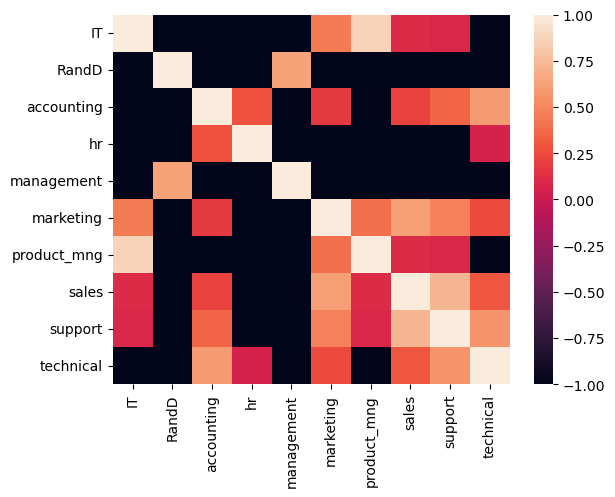

In [40]:
### get t test matrix of different department
dp_keys = list(dp_index.keys())
dp_mat = np.zeros((len(dp_keys),len(dp_keys)))
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value = ss.ttest_ind(df["left"][dp_index[dp_keys[i]]].values,
                                    df["left"][dp_index[dp_keys[j]]].values)[1] # only get p-value
        if p_value <= 0.05:
            dp_mat[i][j] = -1
        else:
            dp_mat[i][j] = p_value
sns.heatmap(dp_mat,xticklabels=dp_keys,yticklabels=dp_keys)

In [43]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [44]:
### Pivot Table Example
piv_tb = pd.pivot_table(df,values="left",index=["promotion_last_5years","salary"],
                        columns=["Work_accident"],aggfunc=np.mean)
piv_tb

Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.082996  0.000000
                      low     0.331728  0.090020
                      medium  0.230683  0.081655
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.023256

<Axes: xlabel='Work_accident', ylabel='promotion_last_5years-salary'>

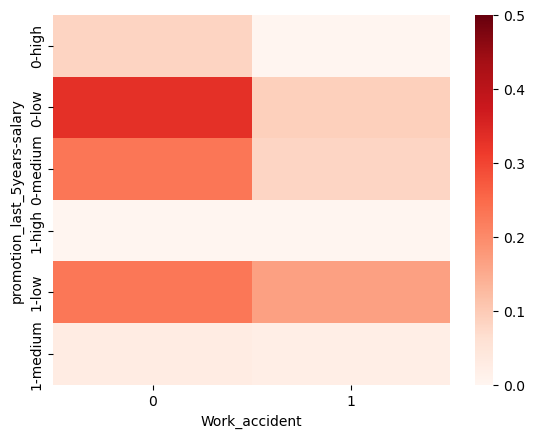

In [45]:
sns.set_context(font_scale=1.5)
sns.heatmap(piv_tb,vmin=0,vmax=0.5,cmap= sns.color_palette("Reds",n_colors=256))

### Grouping
* Gini-Index
    * $Gini(D)= 1-\sum(\frac{C_k}{D})^2$
    * $C_k$ is the corresponding value to D
    * The Gini coefficient ranges from 0 to 1, where 0 represents perfect equality and 1 represents perfect inequality.

In [73]:
s1 = ["X1","X1","X2","X2","X2","X2"]
s2 = ["Y1","Y1","Y1","Y2","Y2","Y2"]

### Calculate Probability Squared Sum for a series
def getProbSS(s):
    # Convert the series 's' into a Pandas Series and calculate the value counts with normalization
    temp_ary = pd.Series(s).value_counts(normalize=True)
    
    # Square the normalized frequencies and return the result
    # This represents the sum of the squares of the probabilities for each unique value
    return sum(temp_ary**2)

### Calculate Gini Index
def getGini(s1, s2):
    # Initialize a dictionary to map each unique value in s1 to a corresponding list of values in s2
    d = dict()
    
    # Iterate over each pair of elements in s1 and s2
    for i in list(range(len(s1))):
        # Append the corresponding element from s2 to the list in the dictionary for the key s1[i]
        d[s1[i]] = d.get(s1[i], []) + [s2[i]]
    
    # Calculate the Gini index
    # For each unique value in s1, calculate the sum of squared probabilities in s2 and weight it by its relative frequency in s1
    # Sum these weighted sums and subtract from 1 to get the overall Gini index
    return 1 - sum([getProbSS(d[k]) * len(d[k]) / float(len(s1)) for k in d])

getGini(s1,s2),getGini(s2,s1)

(0.25, 0.2222222222222222)

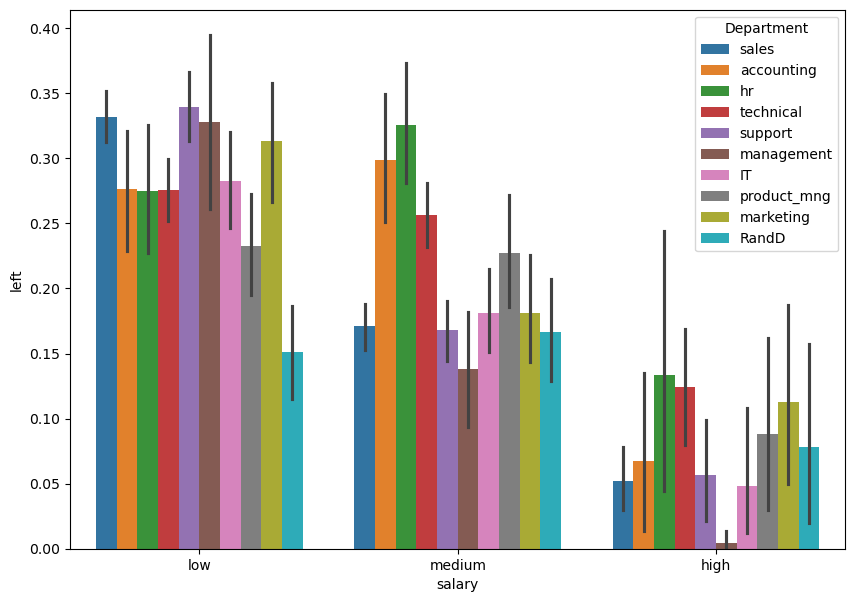

In [46]:
plt.figure(figsize= (10,7))
sns.barplot(x = "salary", y = "left", hue = "Department", data = df)
plt.show()

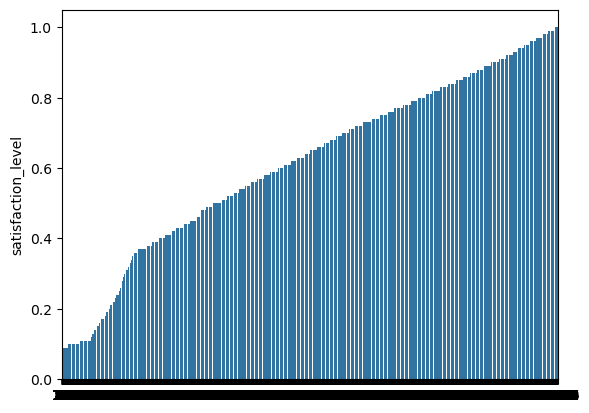

In [47]:
### also, we can use bar plot to help us find the break point

# sl_s = df["satisfaction_level"]
# sns.barplot(x = list(range(len(sl_s))), y = sl_s.sort_values())
# plt.show()


### Correlation Analysis
Entropy and it's related metrics are useful for **categorical variables'** correlation analysis!
* Entropy:  $H(X)=-\sum_{i=1}^{n}P(x_i)logP(x_i)$
    * **Explanation**: Entropy, denoted as $H(X)$, measures the uncertainty or randomness of a random variable X. The summation is over all possible outcomes $x_i$ of X, and $P(x_i)$ is the probability of each outcome. The log base is typically 2, which interprets the entropy in bits.
    * **Example**: Consider a fair coin toss with two outcomes, Heads (H) and Tails (T), each with a probability of 0.5. The entropy is $H(X)=-(0.5log_2 0.5+0.5log_2 0.5 = 1)$ bit.
        * This means it takes 1 bit of information to describe the outcome of a fair coin toss.


* Conditional Entropy $H(X|Y)$: $H(X|Y)=-\sum_{y\in Y}P(y)\sum_{x\in X}P(x|y)logP(x|y)$
    * **Explanation**: Conditional entropy of X given Y measures the average uncertainty remaining about X when Y is known. It's the expected value of the entropies of X conditioned on each outcome of Y.
    * **Example**: Suppose we have two variables, X(Weather: Sunny or Rainy) and Y (Umbrella: Yes or No). If knowing whether someone carries an umbrella (Y) reduces the uncertainty about the weather (X), the conditional entropy $H(X|Y)$ will be lower than independent assumptions.

* Mutual Information / Information Gain ($I$): $I(X;Y) = H(X)-H(X|Y)$ or $\sum_(x\in X, y \in Y) P(x,y)log\frac{P(x,y)}{P(x),P(y)}$
    * **Explanation**: Mutual Information between two variables X and Y measures the amount of information obtained about one through the other. It's the reduction in uncertainty about X due to the knowledge of Y.
    * **Example**: Again, using the Weather (X) and Umbrella (Y) example, mutual information would measure how much knowing whether someone carries an umbrella (Y) tells us about the weather (X). If these two are **highly dependent** (e.g., umbrellas are often carried when it's rainy), the **mutual information will be high**.
    * **Problem**: Biased to variable have more possible values

* Gain Ratio: $GainRatio(X \to Y) = \frac{I(X;Y)}{H(Y)}$ [0-1]
    * **Explanation**: The Gain Ratio is an improvement over basic Mutual Information, particularly in the context of decision tree classifiers.  While **Mutual Information** measures how much "purity" we gain about one variable by knowing the value of another, it can be **biased towards variables with more categories**.   The Gain Ratio attempts to normalize this by dividing the Information Gain by the Entropy ("Split Information"), which accounts for the potential bias by considering the intrinsic information of a split based on the variable Y.
    * **Example**: Suppose in a decision tree, we are trying to decide which attribute to split on at a particular node. Attribute $A$ has a **high Information Gain (I)** but splits the data into many small subsets (high Split Information), whereas Attribute $B$ has a slightly **lower Information Gain** but splits the data into a few large subsets (lower Split Information). The Gain Ratio would favor Attribute $B$ as it provides a more significant, unbiased improvement in purity per unit of split information.
    * **Problem**: $GainRatio(X \to Y) \neq GainRatio(Y \to X)$

* **Correlation based on information theory** : $Corr(X,Y) = \frac{I(X;Y)}{\sqrt{H(X)H(Y)}}$


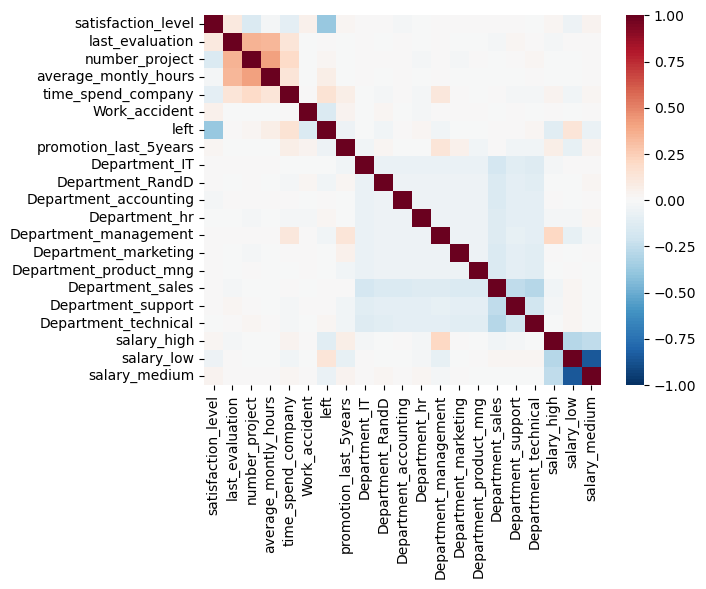

In [55]:
### Correlation plot
# Convert string columns to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Department',"salary"])

sns.heatmap(df_encoded.corr(),vmin = -1, vmax = 1, cmap= sns.color_palette("RdBu_r",n_colors=128))
plt.show()

In [65]:
### Information Theory Test

s1 = ["X1","X1","X2","X2","X2","X2"]
s2 = ["Y1","Y1","Y1","Y2","Y2","Y2"]

## Calculate Entropy
def getEntropy(s):
    temp_ary = pd.Series(s).value_counts(normalize = True)
    # Compute the entropy: -sum(P(x) * log2(P(x)) for all unique values in the series
    # Here, P(x) is the normalized frequency of each unique value in 's'
    return -(np.log2(temp_ary) * temp_ary).sum()

getEntropy(s1),getEntropy(s2)

(0.9182958340544896, 1.0)

In [66]:
## Calculate Conditional Entropy
def getCondEntropy(s1, s2):
    # Initialize a dictionary to map each unique value in s1 to a list of corresponding values in s2
    d = dict()
    
    # Iterate over each pair of elements in s1 and s2
    for i in list(range(len(s1))):
        # Append the corresponding element from s2 to the list in the dictionary for the key s1[i]
        d[s1[i]] = d.get(s1[i], []) + [s2[i]]
    
    # Compute the conditional entropy
    # For each unique value in s1, calculate its entropy in s2 and weight it by its relative frequency in s1
    # Sum these weighted entropies to get the overall conditional entropy
    return sum([getEntropy(d[k]) * len(d[k]) / float(len(s1)) for k in d])

getCondEntropy(s1,s2),getCondEntropy(s2,s1)

(0.5408520829727552, 0.4591479170272448)

In [67]:
## Calculate Information Gain
def getInformationGain(s1,s2):
    return getEntropy(s2) - getCondEntropy(s1,s2)

getInformationGain(s1,s2),getInformationGain(s2,s1)

(0.4591479170272448, 0.4591479170272448)

In [68]:
## Calculate Gain Ratio
def getGainRatio(s1,s2):
    return getInformationGain(s1,s2) / getEntropy(s2)

getGainRatio(s1,s2),getGainRatio(s2,s1)

(0.4591479170272448, 0.5)

In [69]:
import math

In [71]:
## Get Discrete Correlation
def getDiscreteCorr(s1,s2):
    return getInformationGain(s1,s2) / math.sqrt(getEntropy(s1)*getEntropy(s2))

getDiscreteCorr(s1,s2),getDiscreteCorr(s2,s1)

(0.4791387674918639, 0.4791387674918639)